# **ANURAG**

**DATA DESCRIPTION**

In [0]:
import pandas as pd
df=pd.read_csv('/content/dataset_model.csv')


In [0]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df.shape #Shape of data 

(614, 13)

In [215]:
n_df=df.copy()
df1=n_df.drop(columns='Loan_ID')  #remove feature like primary key or unnecessary,here loan_ID
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [216]:
#list the continuous and categorical features
num_cols = df1.columns
continues_v= []
cate=[]
for i in num_cols:
  if(len(df1[i].unique())) >=int(df1.shape[0]/25):
     continues_v.append(i)
  else:
    cate.append(i)
print ('continue variables',continues_v,'\n','Categorical Variables',cate) 

continue variables ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'] 
 Categorical Variables ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


7.491531216657306


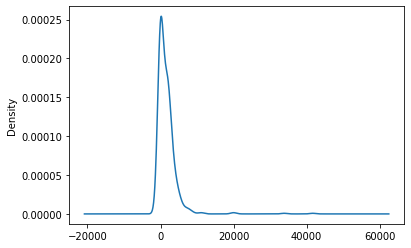

In [206]:
print(df1['CoapplicantIncome'].skew())
df1['CoapplicantIncome'].plot.kde()

2.677551679256059


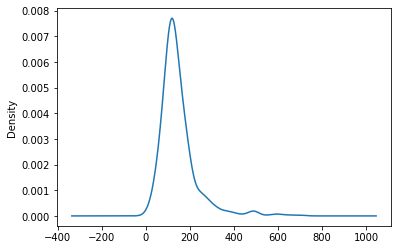

In [207]:
print(df1['LoanAmount'].skew())
df1['LoanAmount'].plot.kde()


6.539513113994625


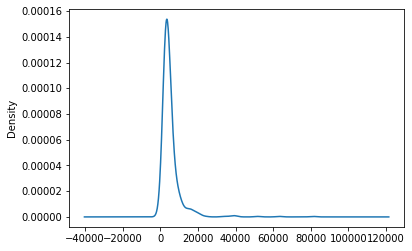

In [209]:
print(df1['ApplicantIncome'].skew())
df1['ApplicantIncome'].plot.kde()

***handling outliers***

***Performing Log Transformation for Outlier Treatment***


In [0]:
import numpy as np
for i in continues_v:
  df1[i+'_log'] = df1[i].map(lambda i: np.log(i) if i > 0 else 0) 

In [250]:
df1 = df1.drop(columns=continues_v)
df1.columns          

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log'],
      dtype='object')

-0.17295088273888753


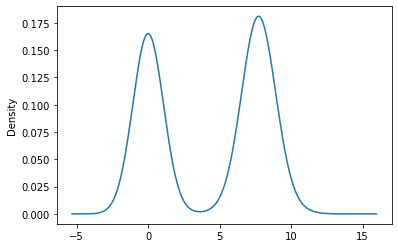

In [220]:
print(df1['CoapplicantIncome_log'].skew())
df1['CoapplicantIncome_log'].plot.kde()

0.4795799780016222


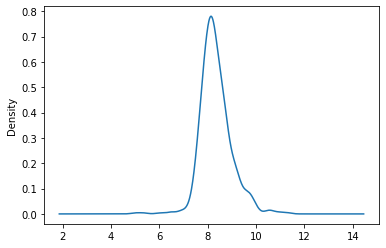

In [221]:
print(df1['ApplicantIncome_log'].skew())
df1['ApplicantIncome_log'].plot.kde()

-3.277028084290791


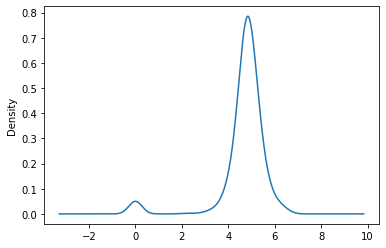

In [222]:
print(df1['LoanAmount_log'].skew())
df1['LoanAmount_log'].plot.kde()

***Handling missing Values***
* Detect missing values

In [42]:
#Missing data percentage list
import numpy as np
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Gender - 2.0%
Married - 0.0%
Dependents - 2.0%
Education - 0.0%
Self_Employed - 5.0%
Loan_Amount_Term - 2.0%
Credit_History - 8.0%
Property_Area - 0.0%
Loan_Status - 0.0%
ApplicantIncome_log - 0.0%
CoapplicantIncome_log - 0.0%
LoanAmount_log - 0.0%


In [271]:
df1.isnull().sum().sort_values(ascending=False)

LoanAmount_log           0
CoapplicantIncome_log    0
ApplicantIncome_log      0
Loan_Status              0
Property_Area            0
Credit_History           0
Loan_Amount_Term         0
Self_Employed            0
Education                0
Dependents               0
Married                  0
Gender                   0
dtype: int64

In [272]:
df1.mode().iloc[0]

Gender                        Male
Married                        Yes
Dependents                       0
Education                 Graduate
Self_Employed                   No
Loan_Amount_Term               360
Credit_History                   1
Property_Area            Semiurban
Loan_Status                      Y
ApplicantIncome_log        7.82405
CoapplicantIncome_log            0
LoanAmount_log             4.85203
Name: 0, dtype: object

In [0]:
for cols in cate:
  if ( df1[cols].isnull().sum() >= 0):
    df1[cols] = df1[cols].fillna(df1[cols].mode().iloc[0])

In [274]:
df1.isnull().sum().sort_values(ascending=False)

LoanAmount_log           0
CoapplicantIncome_log    0
ApplicantIncome_log      0
Loan_Status              0
Property_Area            0
Credit_History           0
Loan_Amount_Term         0
Self_Employed            0
Education                0
Dependents               0
Married                  0
Gender                   0
dtype: int64

In [225]:
df1.median()

ApplicantIncome          3812.500000
CoapplicantIncome        1188.500000
LoanAmount                128.000000
Loan_Amount_Term          360.000000
Credit_History              1.000000
ApplicantIncome_log         8.246040
CoapplicantIncome_log       7.080284
LoanAmount_log              4.828314
dtype: float64

In [0]:
for i in continues_v:
  if( df1[i].isnull().sum() > 0):
    df1[i] = df1[i].fillna(df1[i].median())

In [252]:
df1.isnull().sum().sort_values(ascending=False)

LoanAmount_log           0
CoapplicantIncome_log    0
ApplicantIncome_log      0
Loan_Status              0
Property_Area            0
Credit_History           0
Loan_Amount_Term         0
Self_Employed            0
Education                0
Dependents               0
Married                  0
Gender                   0
dtype: int64

***1.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on - Precision ,Recall & F1 Score ,AUROC***

In [286]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df2=df1.copy()
dfle= pd.DataFrame(le.fit_transform(df2['Loan_Status']))
dfle.columns = (['Loan_Status'])
dfle.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [254]:
print(dfle['Loan_Status'].value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64


In [287]:
df2=df2.drop(columns='Loan_Status')
df2.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log'],
      dtype='object')

***------Use Label Encoder as encoding technique on features , predict using below algorithms------***

***label enc for encoding for cate***


In [288]:
#del cate[8]
cate

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [289]:

for i in cate:
  df2['enc_'+str(i)] = le.fit_transform(df2[i])
df2 = df2.drop(columns = cate)
df2.head()

,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,enc_Gender,enc_Married,enc_Dependents,enc_Education,enc_Self_Employed,enc_Loan_Amount_Term,enc_Credit_History,enc_Property_Area
0,8.674026,0.000000,4.852030,1,0,0,0,0,8,1,2
1,8.430109,7.318540,4.852030,1,1,1,0,0,8,1,0
2,8.006368,0.000000,4.189655,1,1,0,0,1,8,1,2
3,7.856707,7.765569,4.787492,1,1,0,1,0,8,1,2
4,8.699515,0.000000,4.948760,1,0,0,0,0,8,1,2


In [290]:
df2.shape

(614, 11)

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [291]:
X_train, X_test, Y_train, Y_test = train_test_split(df2, dfle, test_size=0.30, random_state=60, stratify=dfle)
print("Train data(rows out of 614):\t"+str(len(X_train)))
print("Train Label data(rows out of 614):\t"+str(len(Y_train)))
print("Test data(rows out of 614):\t"+str(len(X_test)))
print("Test label data(rows out of 614):\t"+str(len(Y_test)))

Train data(rows out of 614):	429
Train Label data(rows out of 614):	429
Test data(rows out of 614):	185
Test label data(rows out of 614):	185


In [264]:
print("For Training Data :")
print(Y_train['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_train['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_train['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_train['Loan_Status'].count()))
print("\nFor Test Set :")
print(Y_test['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_test['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_test['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_test['Loan_Status'].count()))

For Training Data :
1    295
0    134
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.76456876456876
Label 0 class %age: 31.235431235431236

For Test Set :
1    127
0     58
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.64864864864865
Label 0 class %age: 31.35135135135135


***Logistics Regression on Label_encoding***

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
lr_model = LogisticRegression(random_state=60)
lr_model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=60, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lr_model.predict(X_test)

In [295]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("LR Model- Accuracy :")
print(accuracy_score(Y_test, y_pred))
print("LR Model- Precision:")
print (precision_score(Y_test, y_pred))
print ("LR Model- Recall:" )
print( recall_score(Y_test, y_pred))
print ("Random Forest Model- F1 Score:")
print (f1_score(Y_test, y_pred))



Confusion Matrix
[[ 25  33]
 [  1 126]]
LR Model- Accuracy :
0.8162162162162162
LR Model- Precision:
0.7924528301886793
LR Model- Recall:
0.9921259842519685
Random Forest Model- F1 Score:
0.8811188811188813


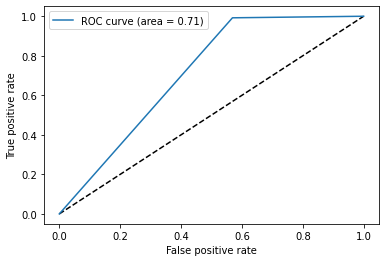

In [296]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

Confusion Matrix
[[21 17]
 [ 1 84]]
LR Model- Accuracy :
0.8536585365853658
LR Model- Precision:
0.8316831683168316
LR Model- Recall:
0.9882352941176471
Random Forest Model- F1 Score:
0.903225806451613


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


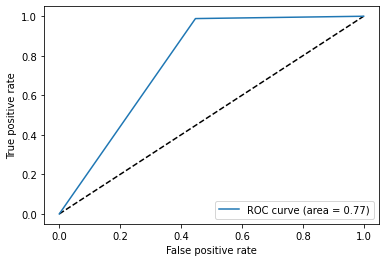

In [310]:
#perameter Tuning
'''changed
test_size = 0.30 to 0.25 
random_state = 60 to 99'''

X_train, X_test, Y_train, Y_test = train_test_split(df2, dfle, test_size=0.25, random_state=99, stratify=dfle)
lr_model = LogisticRegression(random_state=99)
lr_model.fit(X_train, Y_train)

y_pred = lr_model.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("LR Model- Accuracy :")
print(accuracy_score(Y_test, y_pred))
print("LR Model- Precision:")
print (precision_score(Y_test, y_pred))
print ("LR Model- Recall:" )
print( recall_score(Y_test, y_pred))
print ("Random Forest Model- F1 Score:")
print (f1_score(Y_test, y_pred))


fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

***#2. Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on - Precision ,Recall & F1 Score ,AUROC***

In [322]:
X_train, X_test, Y_train, Y_test = train_test_split(df2, dfle, test_size = 0.30, random_state = 60, stratify = dfle)
RF_model1= RandomForestClassifier(random_state=60)
RF_model1.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

In [0]:
y_pred = RF_model1.predict(X_test)

In [324]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Random Forest Model- Accuracy :")
print(accuracy_score(Y_test, y_pred))
print("Random Forest Model- Precision:")
print (precision_score(Y_test, y_pred))
print ("Random Forest Model- Recall:" )
print( recall_score(Y_test, y_pred))
print ("Random Forest Model- F1 Score:")
print (f1_score(Y_test, y_pred))

Confusion Matrix
[[ 29  29]
 [  7 120]]
Random Forest Model- Accuracy :
0.8054054054054054
Random Forest Model- Precision:
0.8053691275167785
Random Forest Model- Recall:
0.9448818897637795
Random Forest Model- F1 Score:
0.8695652173913044


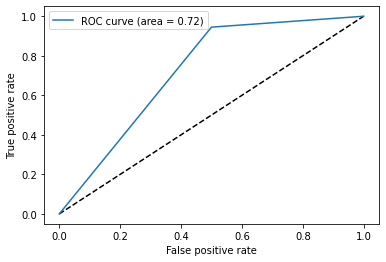

In [325]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
[[26 22]
 [ 7 99]]
Random Forest Model- Accuracy :
0.8116883116883117
Random Forest Model- Precision:
0.8181818181818182
Random Forest Model- Recall:
0.9339622641509434
Random Forest Model- F1 Score:
0.8722466960352423


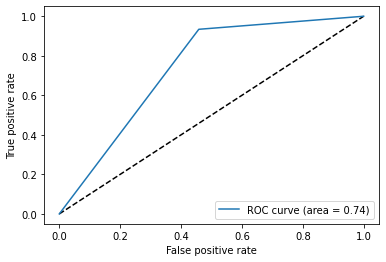

In [326]:
#perameter Tuning
'''changed
test_size = 0.30 to 0.25 
random_state = 60 to 99'''

X_train, X_test, Y_train, Y_test = train_test_split(df2, dfle, test_size = 0.25, random_state = 99, stratify = dfle)
RF_model1= RandomForestClassifier(random_state=99)
RF_model1.fit(X_train,Y_train)


y_pred = RF_model1.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Random Forest Model- Accuracy :")
print(accuracy_score(Y_test, y_pred))
print("Random Forest Model- Precision:")
print (precision_score(Y_test, y_pred))
print ("Random Forest Model- Recall:" )
print( recall_score(Y_test, y_pred))
print ("Random Forest Model- F1 Score:")
print (f1_score(Y_test, y_pred))


fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')



***----- Use One hot Encoder as encoding technique on feature , predict using the below algorithms  ----***

***OHE for Categoracal vairables***

In [327]:
dfohe=df1.copy()
dfohe.shape

(614, 12)

In [328]:
for i in cate:
   dfohe = pd.get_dummies(dfohe, columns=[i], prefix=[i] )
dfohe.head()

,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Y,8.674026,0.000000,4.852030,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,N,8.430109,7.318540,4.852030,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,Y,8.006368,0.000000,4.189655,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,Y,7.856707,7.765569,4.787492,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,Y,8.699515,0.000000,4.948760,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [329]:
dfohe=dfohe.drop(columns='Loan_Status')
dfohe.columns

Index(['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Loan_Amount_Term_12.0', 'Loan_Amount_Term_36.0',
       'Loan_Amount_Term_60.0', 'Loan_Amount_Term_84.0',
       'Loan_Amount_Term_120.0', 'Loan_Amount_Term_180.0',
       'Loan_Amount_Term_240.0', 'Loan_Amount_Term_300.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0',
       'Credit_History_0.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

***#3. Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on - Precision ,Recall & F1 Score ,AUROC***

***Logistics Regression on OHE data***


In [346]:
X_train, X_test, Y_train, Y_test = train_test_split(dfohe, dfle, test_size=0.30, random_state=60, stratify=dfle)
lr_model = LogisticRegression(random_state=60)
lr_model.fit(X_train, Y_train)
y_pred = lr_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


***Precision ,Recall & F1 Score ,AUROC***



In [347]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Logistics Regression  Model- Accuracy :")
print(accuracy_score(Y_test, y_pred))
print("Logistics Regression  Model- Precision:")
print (precision_score(Y_test, y_pred))
print ("Logistics Regression  Model- Recall:" )
print( recall_score(Y_test, y_pred))
print ("Logistics Regression  Model- F1 Score:")
print (f1_score(Y_test, y_pred))

Confusion Matrix
[[ 26  32]
 [  3 124]]
Logistics Regression  Model- Accuracy :
0.8108108108108109
Logistics Regression  Model- Precision:
0.7948717948717948
Logistics Regression  Model- Recall:
0.9763779527559056
Logistics Regression  Model- F1 Score:
0.8763250883392226


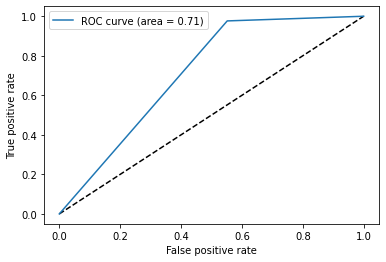

In [333]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

Confusion Matrix
[[ 24  24]
 [  3 103]]
Logistics Regression  Model- Accuracy :
0.8246753246753247
Logistics Regression  Model- Precision:
0.8110236220472441
Logistics Regression  Model- Recall:
0.9716981132075472
Logistics Regression  Model- F1 Score:
0.8841201716738198


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


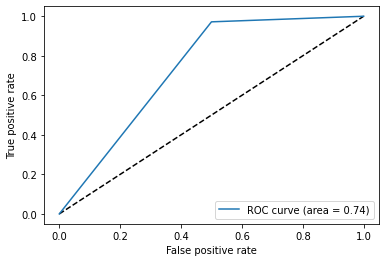

In [334]:
#perameter Tuning
'''changed
test_size = 0.30 to 0.25 
random_state = 60 to 99'''


X_train, X_test, Y_train, Y_test = train_test_split(dfohe, dfle, test_size=0.25, random_state=99, stratify=dfle)
lr_model = LogisticRegression(random_state=99)
lr_model.fit(X_train, Y_train)

y_pred = lr_model.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Logistics Regression  Model- Accuracy :")
print(accuracy_score(Y_test, y_pred))
print("Logistics Regression  Model- Precision:")
print (precision_score(Y_test, y_pred))
print ("Logistics Regression  Model- Recall:" )
print( recall_score(Y_test, y_pred))
print ("Logistics Regression  Model- F1 Score:")
print (f1_score(Y_test, y_pred))


fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

***#4. Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on -  Precision ,Recall & F1 Score ,AUROC***

***Random Forest on OHE***

In [348]:
X_train, X_test, Y_train, Y_test = train_test_split(dfohe, dfle, test_size = 0.20, random_state = 60, stratify = dfle)
RF_model = RandomForestClassifier(random_state=60)
RF_model.fit(X_train,Y_train)
y_pred =RF_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [349]:
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Random Forest Model- Accuracy :")
print(accuracy_score(Y_test, y_pred))
print("Random Forest Model- Precision:")
print (precision_score(Y_test, y_pred))
print ("Random Forest Model- Recall:" )
print( recall_score(Y_test, y_pred))
print ("Random Forest Model- F1 Score:")
print (f1_score(Y_test, y_pred))

----Parameter tuning without GridSearch-----
Confusion Matrix
[[23 15]
 [ 7 78]]
Random Forest Model- Accuracy :
0.8211382113821138
Random Forest Model- Precision:
0.8387096774193549
Random Forest Model- Recall:
0.9176470588235294
Random Forest Model- F1 Score:
0.8764044943820225


In [340]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Random Forest Model- Accuracy :")
print(accuracy_score(Y_test, y_pred))
print("Random Forest Model- Precision:")
print (precision_score(Y_test, y_pred))
print ("Random Forest Model- Recall:" )
print( recall_score(Y_test, y_pred))
print ("Random Forest Model- F1 Score:")
print (f1_score(Y_test, y_pred))

Confusion Matrix
[[ 30  28]
 [  6 121]]
Random Forest Model- Accuracy :
0.8162162162162162
Random Forest Model- Precision:
0.8120805369127517
Random Forest Model- Recall:
0.952755905511811
Random Forest Model- F1 Score:
0.8768115942028987


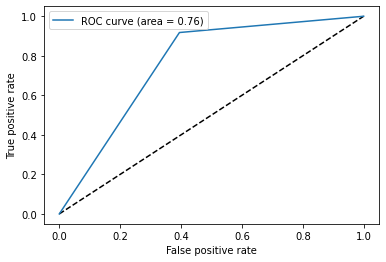

In [350]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

Confusion Matrix
[[24 24]
 [10 96]]
Random Forest Model- Accuracy :
0.7792207792207793
Random Forest Model- Precision:
0.8
Random Forest Model- Recall:
0.9056603773584906
Random Forest Model- F1 Score:
0.8495575221238938


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


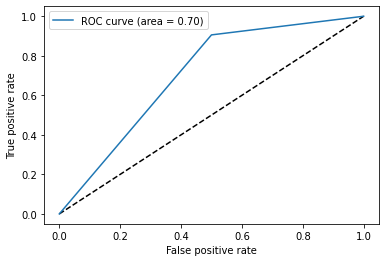

In [342]:
#perameter Tuning
'''changed
test_size = 0.30 to 0.25 
random_state = 60 to 99'''


#train Random forest
X_train, X_test, Y_train, Y_test = train_test_split(dfohe, dfle, test_size = 0.25, random_state = 99, stratify = dfle)
RF_model = RandomForestClassifier(random_state=60)
RF_model.fit(X_train,Y_train)
y_pred =RF_model.predict(X_test)

#print matrices

print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Random Forest Model- Accuracy :")
print(accuracy_score(Y_test, y_pred))
print("Random Forest Model- Precision:")
print (precision_score(Y_test, y_pred))
print ("Random Forest Model- Recall:" )
print( recall_score(Y_test, y_pred))
print ("Random Forest Model- F1 Score:")
print (f1_score(Y_test, y_pred))


#AUROC
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

***Which approach between Label Encoding & One Hot Encoding gave better results in case of both the algorithms used?***









# ****ONE HOT ENCODING :****


 * ****LOGISTICS REGRESSION**** 

*   TRAIN DATA = 80%



 > *   ACCURACY = 0.82
* AURAC CURVE(area) = 0.74



* TRAIN DATA = 75%


> *  ACCURACY = 0.82
*AURAC CURVE(area)= 0.74


 * ****RANDOM FOREST CLASSIFICATION**** 

*   TRAIN DATA = 80%



 > *   ACCURACY = 0.81
* AURAC CURVE(area) = 0.76



* TRAIN DATA = 75%


> *  ACCURACY = 0.81
*AURAC CURVE(area)= 0.70


# ****LABEL ENCODING :****



 * ****LOGISTICS REGRESSION**** 

*   TRAIN DATA = 80%



 > *   ACCURACY = 0.81
* AURAC CURVE(area) = 0.71



* TRAIN DATA = 75%


> *  ACCURACY =  0.85
*AURAC CURVE(area)= 0.77




 * ****RANDOM FOREST CLASSIFICATION**** 

*   TRAIN DATA = 70%



 > *   ACCURACY = 0.80
* AURAC CURVE(area) = 0.72



* TRAIN DATA = 75%


> *  ACCURACY =  0.81
*AURAC CURVE(area)= 0.74




* ****By ovserving above result, for Logistic regrssion, ONE HOT ENCODING is the best way to encodes the categorical data****
* ****And if we use Random Forest Classification the LABEL ENCODING is the best technique to encodes the data****
